Productos: análisis general


Precio promedio: $41.01
Precio más alto: $163.00
Precio mínimo: $2.25



 Productos: top 10, precios más altos
                                               Modelo  Precio     Categoría  \
24                        Plancha Supreme Lizze 485 F  163.00       capilar   
26                     Plancha Digital Hot Tools - 1"  127.30       capilar   
27  Plancha Black Gold Revolutionary hot tools - 1...  127.30       capilar   
28              Secadora Aria Dual Gamma Piu -  Ionic  122.20       capilar   
0              Alisador Kera Coffee Vegan de 1000 ml.  117.05  tratamientos   
29             Alisador Kera Coffee Vegan de 1000 ml.  117.05       capilar   
25                Máquina Inalámbrica Magic Clip Wahl  112.58       capilar   
1   Emulsion Alisadora Maxybelt Libre De Formol - ...  107.81  tratamientos   
30  Emulsion Alisadora Maxybelt Libre De Formol - ...  107.81       capilar   
31                Tenaza profesional 2 en 1 Hot Tools  107.70       c

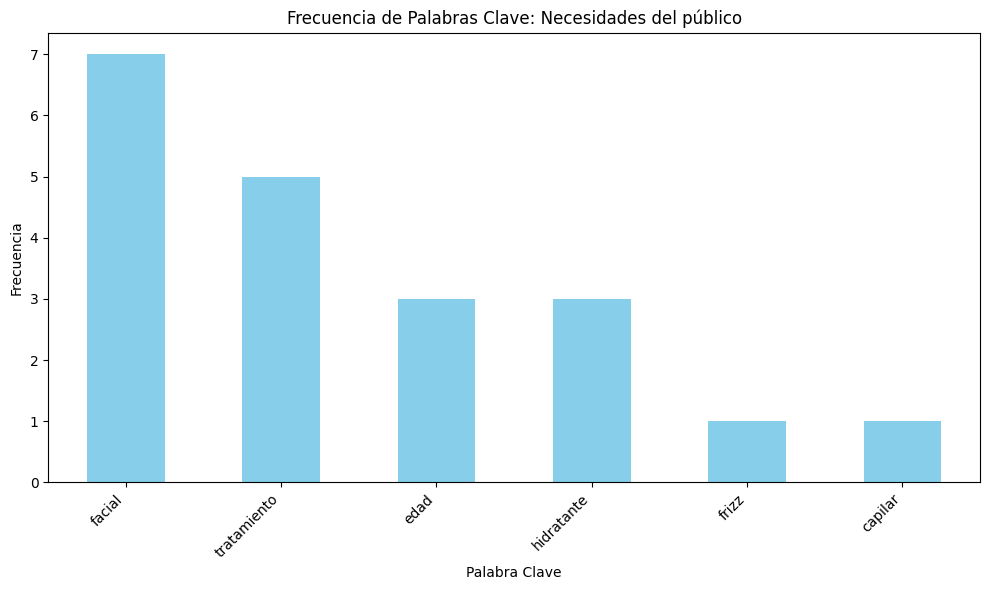

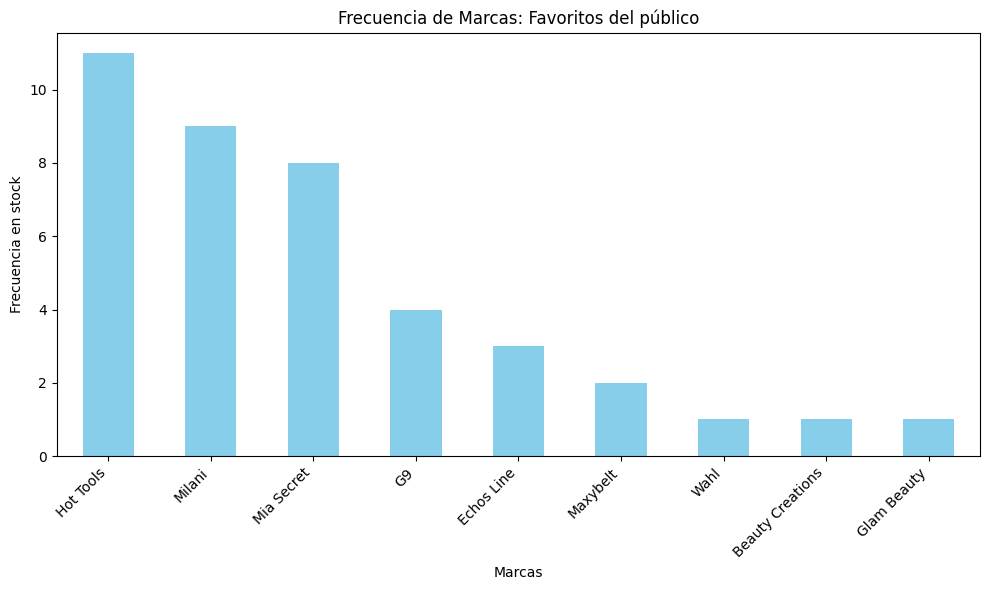

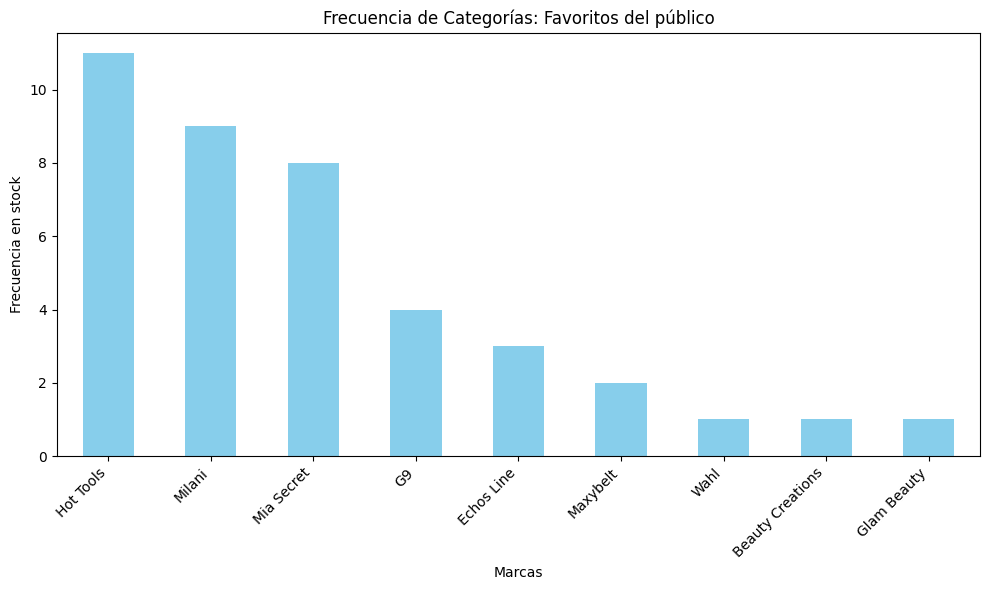

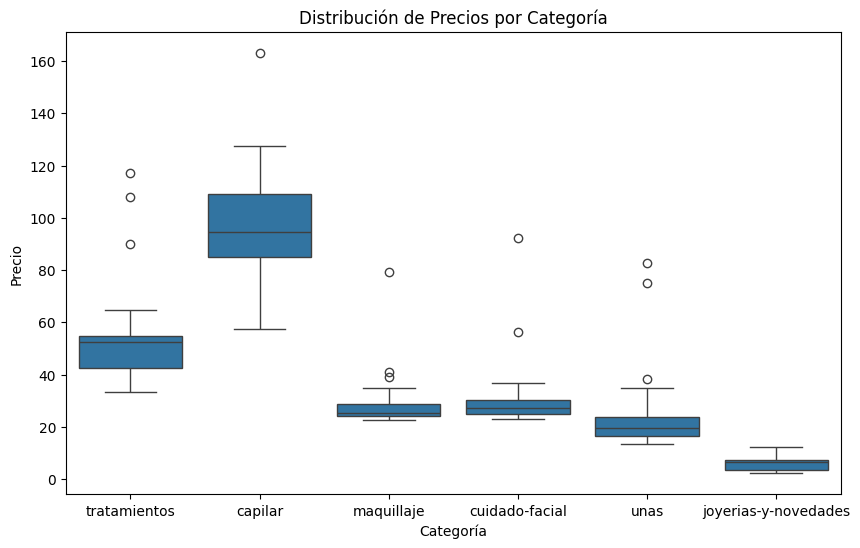

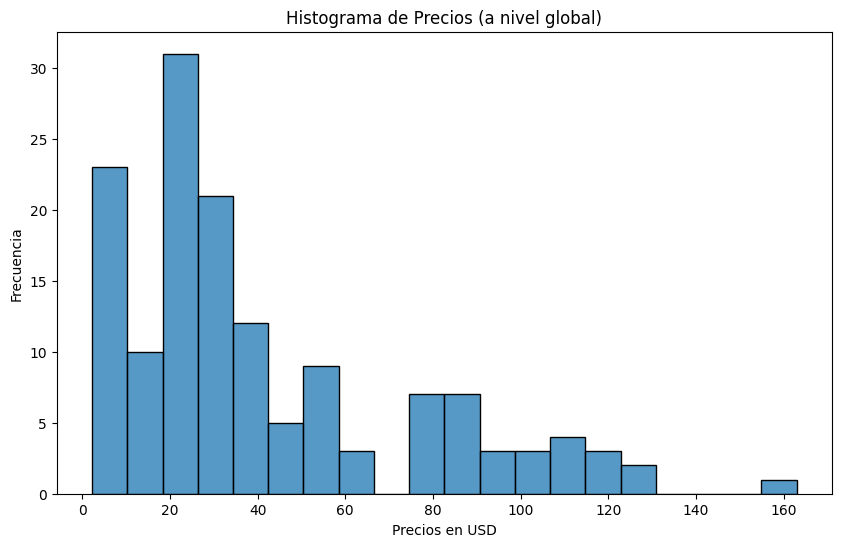

In [2]:
import sys
sys.path.append('../')

import pandas as pd # Manipulación de datos
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns
from src.analysis.analysis import analyze_data, contar_palabras_clave


data_path = "../data/processed/scraped_all_data"
file_type = ".csv"
read_file_path = f"{data_path}{file_type}"
df = pd.read_csv(read_file_path)

# Analisis general
analyze_data(df)

# Agrupa por categoría y calcula estadísticas descriptivas
estadisticas_por_categoria = df.groupby('Categoría')['Precio'].describe()
# Identifica las categorías con los precios más altos y más bajos
categorias_extremas = estadisticas_por_categoria.sort_values(by='mean', ascending=False)

# Marcas preferidas del público
frecuencia_marcas = df['Marca'].value_counts()
# Categorías preferidas del público
frecuencia_categorías = df['Categoría'].value_counts()

# Aplicar la función de contar_palabras_clave a la columna 'Producto' y crear un nuevo DataFrame con las frecuencias de las palabras clave
df_palabras_clave = pd.DataFrame(df['Modelo'].apply(contar_palabras_clave).tolist())

# Sumar las frecuencias de las palabras clave para obtener la frecuencia total de cada palabra clave
frecuencia_total_palabras_clave = df_palabras_clave.sum()

# Crear un gráfico de barras para visualizar la frecuencia de las palabras clave
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
frecuencia_total_palabras_clave.sort_values(ascending=False).plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Frecuencia de Palabras Clave: Necesidades del público')  # Título del gráfico
plt.xlabel('Palabra Clave')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el gráfico

# Histograma de frecuencia de marcas
# Crear un gráfico de barras para visualizar la frecuencia de las marcas
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
frecuencia_marcas.plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Frecuencia de Marcas: Favoritos del público')  # Título del gráfico
plt.xlabel('Marcas')  # Etiqueta del eje x
plt.ylabel('Frecuencia en stock')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el gráfico

# Crear un gráfico de barras para visualizar la frecuencia de las categorías
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
frecuencia_categorías.plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Frecuencia de Categorías: Favoritos del público')  # Título del gráfico
plt.xlabel('Marcas')  # Etiqueta del eje x
plt.ylabel('Frecuencia en stock')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el gráfico

# Visualización con Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoría', y='Precio', data=df)
plt.title('Distribución de Precios por Categoría')
plt.show()

# Visualización con Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio'], bins=20)
plt.title('Histograma de Precios (a nivel global)')
plt.xlabel("Precios en USD")
plt.ylabel("Frecuencia")
plt.show()